## The Convolutional Neural Network

We will use a convolutional neural network to detect the emotions. 
We will train our model using the FER2013 dataset. Then, using the trained model, we will detect the emotions in the faces detected in the video stream captured by the camera or the video file.


In [17]:
import  tensorflow  as  tf
from  tensorflow  import  keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.model_selection import train_test_split

import numpy as  np
import matplotlib.pyplot  as  plt
import os
import cv2
import random
import cv2 as cv


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

#print the number of GPU

print ( "Num GPUs Available: " ,  len ( tf.config.experimental.list_physical_devices ( 'GPU' )))

Num GPUs Available:  1


2022-11-18 17:25:08.187026: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:25:08.187198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:25:08.187310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:25:08.187490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:25:08.187614: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

# Load the dataset

Load and differentiate between training and testing data (they are spit in two folders, one for training and one for testing).

In [27]:
datasetToUse = "CK+48"

### FER2013 dataset

In [18]:
#load the data
if datasetToUse == "FER2013":
        
        path = "./dataset/FER2013/"
        test_path = path + "test/"
        train_path = path + "train/"


        train_x = []
        train_y = []
        test_x = []
        test_y = []

        #load the train data

        classes = { "angry" : 0,  "disgust" : 1,  "fear" : 2,  "happy" : 3,  "sad" : 4,  "surprise" : 5,  "neutral" : 6}
        classesDiz2 = { 0 : "angry" ,  1 : "disgust" ,  2 : "fear" ,  3 : "happy" ,  4 : "sad" ,  5 : "surprise" ,  6 : "neutral" }

        data_generator = ImageDataGenerator(rescale=1./255)




        batch_size = 32
        # Preprocess all test images
        train_generator = data_generator.flow_from_directory(
                train_path,
                target_size=(48, 48),
                batch_size=64,
                color_mode="grayscale",
                class_mode='categorical')

        # Preprocess all train images
        validation_generator = data_generator.flow_from_directory(
                test_path,
                target_size=(48, 48),
                batch_size=64,
                color_mode="grayscale",
                class_mode='categorical')




                



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### CK+ dataset

CK+ dataset

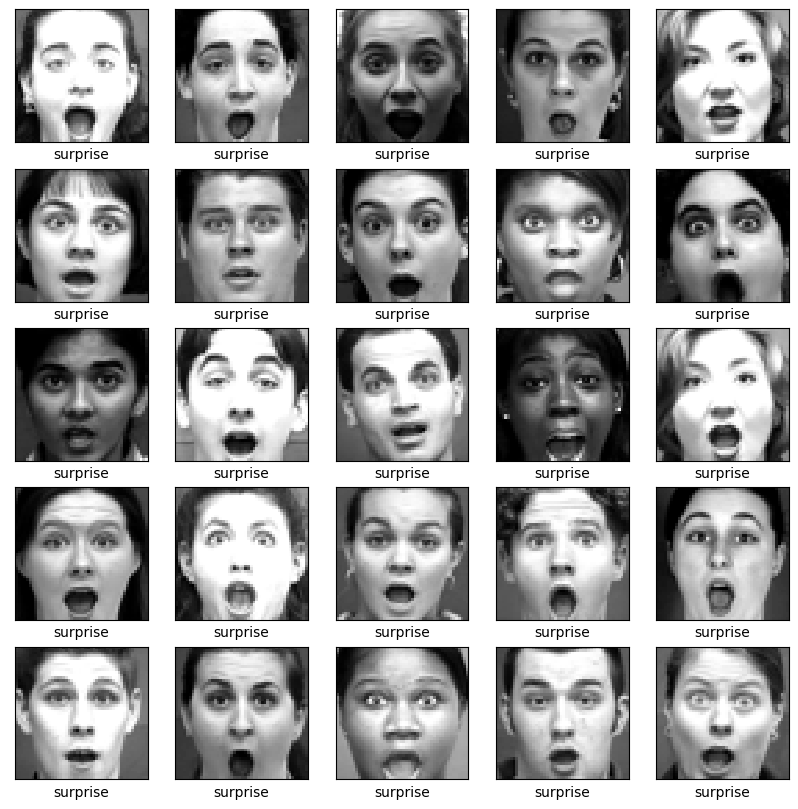

(981, 48, 48)


In [31]:

#load the data
if datasetToUse == "CK+48":
    dataset_path = "./dataset/CK+48/"

    data = []
    labels = []

    for folder in os.listdir(dataset_path):
        for file in os.listdir(dataset_path + folder):
            image = cv.imread(dataset_path + folder + "/" + file, 0)

            data.append(image)
            labels.append(folder)

    print(data.shape)
    #plot some images
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[i], cmap="gray")
        plt.xlabel(labels[i])
    plt.show()


    #convert the data to numpy array

    data = np.array(data)



## Train the model

In [20]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Convolution2D, BatchNormalization, Activation, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D
from keras.models import Sequential



In [21]:
input_shape=(48, 48, 1)
num_classes = 7
weight_decay = 1e-4

modelType = "modelFromYoutube"


def EmotionNet():


    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=input_shape))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))

    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('softmax'))


    

    return model
    


def modelFromYoutube():

    model = keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))

    return model



                
# create the model

if modelType == "VGG16":
    model = EmotionNet()
elif modelType == "modelFromYoutube":
    model = modelFromYoutube()


model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [22]:
#train the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

history = model.fit(train_generator, epochs=50, validation_data=validation_generator)





Epoch 1/50


/home/theshadow/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


449/449 [==============================] - 7s 13ms/step - loss: 1.7991 - accuracy: 0.2621 - val_loss: 1.7115 - val_accuracy: 0.3298
Epoch 2/50
449/449 [==============================] - 5s 12ms/step - loss: 1.6205 - accuracy: 0.3690 - val_loss: 1.5328 - val_accuracy: 0.4149
Epoch 3/50
449/449 [==============================] - 5s 12ms/step - loss: 1.5203 - accuracy: 0.4155 - val_loss: 1.4568 - val_accuracy: 0.4419
Epoch 4/50
449/449 [==============================] - 6s 12ms/step - loss: 1.4505 - accuracy: 0.4439 - val_loss: 1.3910 - val_accuracy: 0.4755
Epoch 5/50
449/449 [==============================] - 6s 12ms/step - loss: 1.3937 - accuracy: 0.4708 - val_loss: 1.3413 - val_accuracy: 0.4891
Epoch 6/50
449/449 [==============================] - 6s 13ms/step - loss: 1.3407 - accuracy: 0.4944 - val_loss: 1.2951 - val_accuracy: 0.5075
Epoch 7/50
449/449 [==============================] - 6s 13ms/step - loss: 1.2951 - accuracy: 0.5106 - val_loss: 1.2792 - val_accuracy: 0.5120
Epoch 8/50

In [ ]:

#plot the accuracy and loss
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


In [ ]:
#save the model
model.save('model.h5')


113/113 [==============================] - 1s 7ms/step


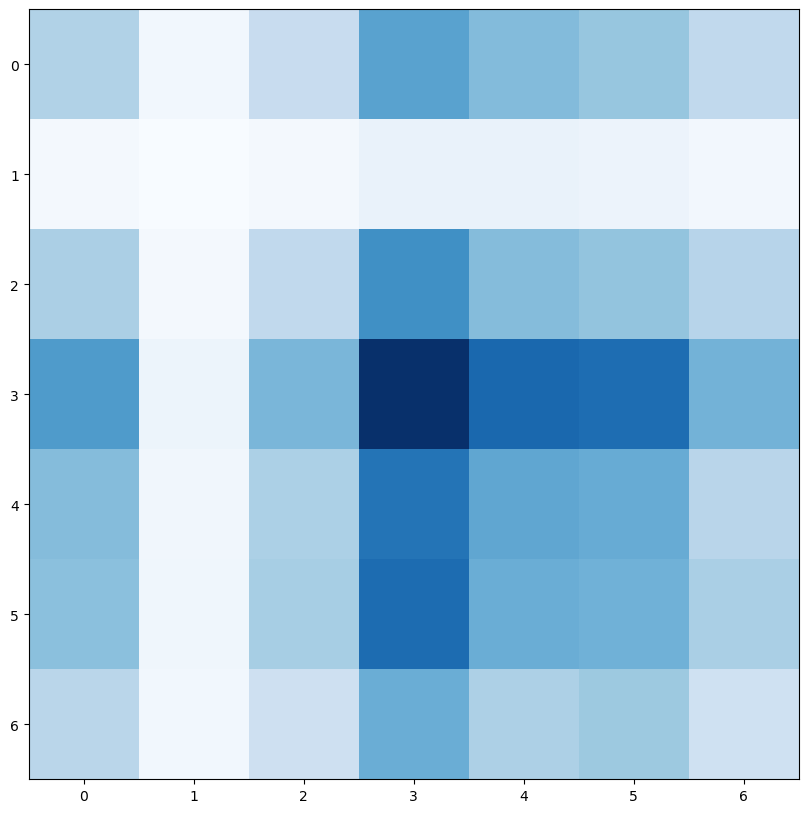

In [23]:
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

dipslay = confusion_matrix(validation_generator.classes, np.argmax(model.predict(validation_generator), axis=-1))

plt.figure(figsize=(10,10))

plt.imshow(dipslay, interpolation='nearest', cmap=plt.cm.Blues)




# Setup the application

In [1]:
#import the module to read from webcam 
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

classes = { "angry" : 0,  "disgust" : 1,  "fear" : 2,  "happy" : 3,  "sad" : 4,  "surprise" : 5,  "neutral" : 6}

2022-11-18 17:17:52.775056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 17:17:52.865685: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-18 17:17:52.889124: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 17:17:53.299925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

The cell below captures a video stream of the camera and displays it in the notebook. The video stream is captured using the OpenCV library. 
If we want to capture from a video file, we can use the following code:

cv.VideoCapture('project_video.mp4')

On the other hand, if we want to use the camera, we can use the following code:

cv.VideoCapture(0)


In [2]:
videoPath = "METTERE QUI IL PATH DEL VIDEO"

if videoPath == "METTERE QUI IL PATH DEL VIDEO" or videoPath == "":
    cap = cv.VideoCapture(0)
else:
    cap = cv.VideoCapture(videoPath)

#there are 7 emotions
num_classes = 7

#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
classes = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
    


Below, we will choose if we want to dected the frontal faces, the profile or both. We will use the frontal face cascade classifier by default.

In [3]:
haarDetectionMode = "profile"

In [4]:
haarDetectionMode = "profileAndFrontal"

In [5]:
haarDetectionMode = "frontal"

In [6]:
saveCroppedFaces = True
predictEmotions = False

The function detect faces uses haar cascade to detect faces in the frame. 
There are two versions of haar cascades, one for profile faces and one for frontal faces.



In [7]:
def detectFaces(frame):

    detectedFaces = []


    #use haar cascade to detect faces
    if haarDetectionMode == "frontal" or haarDetectionMode == "profileAndFrontal":
        faceCascadeFrontal = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
        facesFrontal = faceCascadeFrontal.detectMultiScale(frame, 1.1, 4)

        detectedFaces.extend(facesFrontal)

    elif haarDetectionMode == "profile" or haarDetectionMode == "profileAndFrontal":
        faceCascadeProfile = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_profileface.xml')
        facesProfile = faceCascadeProfile.detectMultiScale(frame, 1.1, 4)

        detectedFaces.extend(facesProfile)




    

    return detectedFaces

In [8]:
def drawRectangleFace(frame, facesCoordinates):
    #draw the rectangle around the face
    frameWithRectangle = frame.copy()
    for (x, y, w, h) in facesCoordinates:
        cv.rectangle(frameWithRectangle, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    return frameWithRectangle
        
        
    
        

In [9]:
def plotImage(image):
    plt.imshow(image)
    plt.show()

In [10]:
def predictEmotion(face):
    #resize the image
    face = cv.resize(face, (48, 48))

    #convert the image to float
    face = face.astype('float32')
    #normalize the image
    face /= 255
    #reshape the image
    face = face.reshape(1, 48, 48, 1)
    #predict the emotion
    emotion = model.predict(face)
    return emotion

In [11]:
if predictEmotions:
    #load the model
    model = keras.models.load_model('model.h5')
    

2022-11-18 17:17:54.401115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:17:54.405186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:17:54.405309: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 17:17:54.405630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [12]:
def writeEmotionOnImage(frame, facesCoordinates, emotions):
    frameWithEmotion = frame.copy()
    for (x, y, w, h), emotion in zip(facesCoordinates, emotions):
        #get the emotion with the highest probability
        emotion = np.argmax(emotion)
        #get the emotion label
        emotionLabel = classes[emotion]
        #write the emotion label on the image
        cv.putText(frameWithEmotion, emotionLabel, (x, y), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv.LINE_AA)
    return frameWithEmotion

In [13]:

def showVideo():
    ret,frame = cap.read()

    if not ret:
        print("Unable to capture video")
        exit()
        
    
    #flip the image
    frame = cv.flip(frame,1)
    grayFrame = frame
    #convert the image to grayscale
    if frame is not None:
        grayFrame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        

    

    #detect the face
    facesCoordinates = detectFaces(grayFrame)

    #draw the rectangle around the face
    frameToShow = drawRectangleFace(frame, facesCoordinates)

    if predictEmotions:

        emotions = []
        for (x, y, w, h) in facesCoordinates:
            #crop the face
            face = grayFrame[y:y+h, x:x+w]
            face = cv.resize(face, (48, 48))
            #convert to numpy array
            face = np.array(face)
            face.reshape(48, 48, 1)

            #save the face
            if saveCroppedFaces:
                cv.imwrite("./savedFaces/face.jpg", face)
            
            
            #print the shape


            #face to grayscale

            #predict the emotion
            emotion = predictEmotion(face)
            emotions.append(emotion)
            

        frameToShow = writeEmotionOnImage(frameToShow, facesCoordinates, emotions)


    #display the image
    cv.imshow('frame',frameToShow)
    ret = True
    if cv.waitKey(1) & 0xFF == ord('q'):
        ret = False
        
    return ret, frame, facesCoordinates

In [14]:
ret = True
while ret:
    
    

    #show the video with the face detected
    ret, frame, facesCoordinates = showVideo()


                
            
    
#release the camera
cap.release()
#close all windows
cv.destroyAllWindows()

QApplication: invalid style override 'adwaita' passed, ignoring it.
	Available styles: Windows, Fusion
2022-11-18 17:17:56.345455: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-18 17:17:56.837133: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-11-18 17:17:56.838365: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-11-18 17:17:56.838373: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-11-18 17:17:56.838415: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying

1/1 [==============================] - 0s 14ms/step


2022-11-18 17:17:57.253455: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 15ms/step
